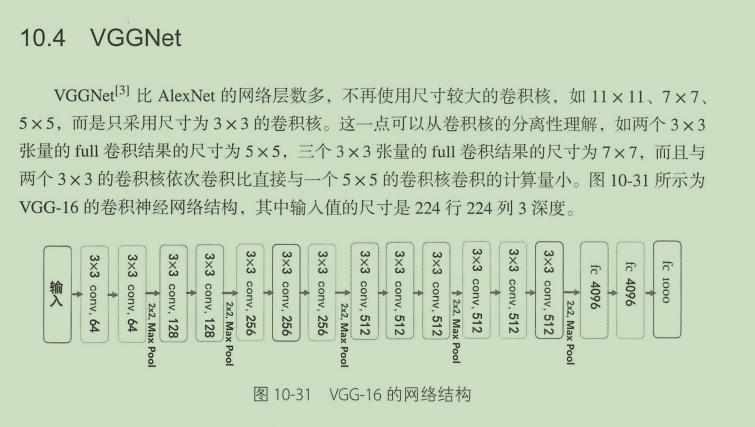

In [2]:
import tensorflow as tf
import numpy as np

In [3]:
x=tf.placeholder(tf.float32,[None, 224,224,3])

# 第一层
## 输入层与64个3行3列3深度的卷积核same卷积,将卷积结果加偏置， 然后输入ReLU激活函数

In [4]:
with tf.variable_scope('layer1',reuse=tf.AUTO_REUSE):
    # 64个3行3列3深度的卷积核
    w1=tf.Variable(tf.random_normal([3,3,3,64]) ,dtype=tf.float32, name='w')
    #步长为1的same卷积
    c1=tf.nn.conv2d(x,w1,[1,1,1,1],'SAME')
    #因为c1的深度为64, 所以偏置的长度为64
    b1=tf.Variable(tf.random_normal([64]),dtype=tf.float32, name='b')
    #卷积结果与偏置相加
    c1=tf.nn.bias_add(c1,b1)
    #relu激活函数
    c1=tf.nn.relu(c1)

# 第2层
## 将第一层的结果（其尺寸为224行为224列64深度）与64个3列3行64深度的卷积核same卷积，将卷积结果加偏置， 然后输入ReLU激活函数

In [9]:
with tf.variable_scope('layer2',reuse=tf.AUTO_REUSE):
    # 64个3行3列64深度的卷积核
    w2=tf.Variable(tf.random_normal([3,3,64,64]) ,dtype=tf.float32, name='w')
    #步长为1的same卷积
    c2=tf.nn.conv2d(c1,w2,[1,1,1,1],'SAME')
    #因为c2的深度为64, 所以偏置的长度为64
    b2=tf.Variable(tf.random_normal([64]),dtype=tf.float32, name='b')
    #卷积结果与偏置相加
    c2=tf.nn.bias_add(c2,b2)
    #relu激活函数
    c2=tf.nn.relu(c2)  # c2 224行224列64深度
    # 对c2进行same最大值池化操作， 邻域掩码的尺寸为2行2列， 步长均为2
    p_c2=tf.nn.max_pool(c2, [1,2,2,1],[1,2,2,1],'SAME')
    #池化后， 结果的尺寸为112行112列64深度

# 第3步， 
## 池化后， 结果的尺寸为112行112列64深度， 也就是将宽和高的尺寸变小了， 为了保证每一层的计算量差距不太大， 在宽和高方向上虽然尺寸变小了， 想办法在深度方向上增加尺寸即可，将池化结果与128个3行3列64深度的卷积核卷积

In [10]:
with tf.variable_scope('layer3',reuse=tf.AUTO_REUSE):
    #128个3行3列64深度的卷积核
    w3=tf.Variable(tf.random_normal([3,3,64,128]), dtype=tf.float32, name='w')
    
    #步长为1的same卷积
    c3=tf.nn.conv2d(p_c2,w3,[1,1,1,1], 'SAME')
    #因为c3的深度为128, 所以偏置的长度为128
    b3=tf.Variable(tf.random_normal([128]) ,dtype=tf.float32, name='b')
    #卷积结果与偏置相加
    c3=tf.nn.bias_add(c3, b3)
    #relu激活函数
    c3=tf.nn.relu(c3)

# 第四层
## 经过第3层的， 输出结果的尺寸仍为112行112列128深度， 接着与128个3行3列128深度的卷积核same卷积， 将卷积结果加偏置， 然后输入ReLU激活函数， 

In [13]:
with tf.variable_scope('layer4',reuse=tf.AUTO_REUSE):
    # 128个3行3列128深度的卷积核
    w4=tf.Variable(tf.random_normal([3,3,128,128]), dtype=tf.float32, name='w')
    #步长为1的same卷积
    c4=tf.nn.conv2d(c3, w4,[1,1,1,1], 'SAME')
    # 因为c4的深度为128， 所以偏置的长度为128
    b4=tf.Variable(tf.random_normal([128]), dtype=tf.float32, name='b')
    #卷积结果与偏置相加
    c4=tf.nn.bias_add(c4,b4)
    #relu激活函数
    c4=tf.nn.relu(c4)
    # 对c4进行same最大值池化操作， 邻域掩码的尺寸为2行2列， 步长均为2
    p_c4=tf.nn.max_pool(c4,[1,2,2,1],[1,2,2,1],'SAME')

# 第5层， 池化操作后的结果尺寸为56行56列128深度， 显然这时宽和高的尺寸减小了， 为了在深度方向上增加尺寸，接着与256个3行3列128深度卷积核卷积, 将卷积结果加偏置， 输入ReLU激活函数

In [14]:
with tf.variable_scope('layer5',reuse=tf.AUTO_REUSE):
    # 256个3行3列128深度的卷积核
    w5=tf.Variable(tf.random_normal([3,3,128,256]), dtype=tf.float32, name='w')
    #步长为1的same卷积
    c5=tf.nn.conv2d(p_c4, w5,[1,1,1,1], 'SAME')
    # 因为c5的深度为256， 所以偏置的长度为256
    b5=tf.Variable(tf.random_normal([256]), dtype=tf.float32, name='b')
    #卷积结果与偏置相加
    c5=tf.nn.bias_add(c5,b5)
    #relu激活函数
    c5=tf.nn.relu(c5)

# 第6层，
## 经过第5层后， 输出结果的尺寸为56行56列256深度， 接到与256个3行3列256深度的卷积核same卷积， 将卷积结果加偏置， 然后输入ReLU激活函数

In [15]:
with tf.variable_scope('layer6',reuse=tf.AUTO_REUSE):
    # 256个3行3列256深度的卷积核
    w6=tf.Variable(tf.random_normal([3,3,256,256]), dtype=tf.float32, name='w')
    #步长为1的same卷积
    c6=tf.nn.conv2d(c5, w6,[1,1,1,1], 'SAME')
    # 因为c6的深度为256， 所以偏置的长度为256
    b6=tf.Variable(tf.random_normal([256]), dtype=tf.float32, name='b')
    #卷积结果与偏置相加
    c6=tf.nn.bias_add(c6,b6)
    #relu激活函数
    c6=tf.nn.relu(c6)

# 第7层，
## 经过第6层后， 输出结果的尺寸为56行56列256深度， 接到与256个3行3列256深度的卷积核same卷积， 将卷积结果加偏置， 然后输入ReLU激活函数

In [18]:
with tf.variable_scope('layer7',reuse=tf.AUTO_REUSE):
    # 256个3行3列256深度的卷积核
    w7=tf.Variable(tf.random_normal([3,3,256,256]), dtype=tf.float32, name='w')
    #步长为1的same卷积
    c7=tf.nn.conv2d(c6, w7,[1,1,1,1], 'SAME')
    # 因为c7的深度为256， 所以偏置的长度为256
    b7=tf.Variable(tf.random_normal([256]), dtype=tf.float32, name='b')
    #卷积结果与偏置相加
    c7=tf.nn.bias_add(c7,b7)
    #relu激活函数
    c7=tf.nn.relu(c7)
    
    # 对c7进行same最大值池化操作， 掩码尺寸为2行2列， 步长均为2
    p_c7=tf.nn.max_pool(c7,[1,2,2,1],[1,2,2,1],'SAME')

# 第8层， 
## 经过上述池化操作， 输出结果的尺寸为28行28列256深度， 显然这时宽和高的尺寸都减小了， 为了增加在深度方向上的尺寸， 接着与512个3行3列256深度的卷积核卷积， 将卷积结果加偏置， 然后输入ReLU激活函数

In [19]:
with tf.variable_scope('layer8',reuse=tf.AUTO_REUSE):
    # 512个3行3列256深度的卷积核
    w8=tf.Variable(tf.random_normal([3,3,256,512]), dtype=tf.float32, name='w')
    #步长为1的same卷积
    c8=tf.nn.conv2d(p_c7, w8,[1,1,1,1], 'SAME')
    # 因为c8的深度为512， 所以偏置的长度为512
    b8=tf.Variable(tf.random_normal([512]), dtype=tf.float32, name='b')
    #卷积结果与偏置相加
    c8=tf.nn.bias_add(c8,b8)
    #relu激活函数
    c8=tf.nn.relu(c8)

# 第9层， 经过第8层后， 输出结果的尺寸为28行28列512深度， 接着与512个3行3列512深度的卷积核same卷积， 将卷积结果加偏置， 然后输入ReLU激活函数

In [20]:
with tf.variable_scope('layer9',reuse=tf.AUTO_REUSE):
    # 512个3行3列512深度的卷积核
    w9=tf.Variable(tf.random_normal([3,3,512,512]), dtype=tf.float32, name='w')
    #步长为1的same卷积
    c9=tf.nn.conv2d(c8, w9,[1,1,1,1], 'SAME')
    # 因为c9的深度为512， 所以偏置的长度为512
    b9=tf.Variable(tf.random_normal([512]), dtype=tf.float32, name='b')
    #卷积结果与偏置相加
    c9=tf.nn.bias_add(c9,b9)
    #relu激活函数
    c9=tf.nn.relu(c9)

# 第10层， 经过第9层后， 输出结果的尺寸为28行28列512深度， 接着与512个3行3列512深度的卷积核same卷积， 将卷积结果加偏置， 然后ReLU激活

In [21]:
with tf.variable_scope('layer10',reuse=tf.AUTO_REUSE):
    # 512个3行3列512深度的卷积核
    w10=tf.Variable(tf.random_normal([3,3,512,512]), dtype=tf.float32, name='w')
    #步长为1的same卷积
    c10=tf.nn.conv2d(c9, w10,[1,1,1,1], 'SAME')
    # 因为c10的深度为512， 所以偏置的长度为512
    b10=tf.Variable(tf.random_normal([512]), dtype=tf.float32, name='b')
    #卷积结果与偏置相加
    c10=tf.nn.bias_add(c10,b10)
    #relu激活函数
    c10=tf.nn.relu(c10)
    
    # 最大值池化
    p_c10=tf.nn.max_pool(c10,[1,2,2,1],[1,2,2,1],'SAME')

# 第11层
## 经过上述池化操作后， 输出结果的尺寸为14行14列512深度， 接着与512个3行3列512深度的卷积核卷积， 将卷积结果加偏置， 然后输入ReLU激活函数

In [22]:
with tf.variable_scope('layer11',reuse=tf.AUTO_REUSE):
    # 512个3行3列512深度的卷积核
    w11=tf.Variable(tf.random_normal([3,3,512,512]), dtype=tf.float32, name='w')
    #步长为1的same卷积
    c11=tf.nn.conv2d(p_c10, w11,[1,1,1,1], 'SAME')
    # 因为c11的深度为512， 所以偏置的长度为512
    b11=tf.Variable(tf.random_normal([512]), dtype=tf.float32, name='b')
    #卷积结果与偏置相加
    c11=tf.nn.bias_add(c11,b11)
    #relu激活函数
    c11=tf.nn.relu(c11)

# 第12层
## 经过第11层后， 输出结果的尺寸为14行14列512深度， 接着与512个3行3列512深度的卷积核卷积， 将卷积结果加偏置， 然后输入ReLU激活函数

In [23]:
with tf.variable_scope('layer12',reuse=tf.AUTO_REUSE):
    # 512个3行3列512深度的卷积核
    w12=tf.Variable(tf.random_normal([3,3,512,512]), dtype=tf.float32, name='w')
    #步长为1的same卷积
    c12=tf.nn.conv2d(c11, w12,[1,1,1,1], 'SAME')
    # 因为c12的深度为512， 所以偏置的长度为512
    b12=tf.Variable(tf.random_normal([512]), dtype=tf.float32, name='b')
    #卷积结果与偏置相加
    c12=tf.nn.bias_add(c12,b12)
    #relu激活函数
    c12=tf.nn.relu(c12)

# 第13层
## 经过第12层后， 输出结果的尺寸为14行14列512深度， 接着与512个3行3列512深度的卷积核卷积， 将卷积结果加偏置， 然后输入ReLU激活函数

In [25]:
with tf.variable_scope('layer13',reuse=tf.AUTO_REUSE):
    # 512个3行3列512深度的卷积核
    w13=tf.Variable(tf.random_normal([3,3,512,512]), dtype=tf.float32, name='w')
    #步长为1的same卷积
    c13=tf.nn.conv2d(c12, w13,[1,1,1,1], 'SAME')
    # 因为c13的深度为512， 所以偏置的长度为512
    b13=tf.Variable(tf.random_normal([512]), dtype=tf.float32, name='b')
    #卷积结果与偏置相加
    c13=tf.nn.bias_add(c13,b13)
    #relu激活函数
    c13=tf.nn.relu(c13)
    
    # 最大值池化
    p_c13=tf.nn.max_pool(c13,[1,2,2,1],[1,2,2,1],'SAME')
    
    # 其结果可以看作一个全连接神经网络的输入层
    shape=p_c13.get_shape()
    flatten_p_c13=tf.reshape(p_c13,[-1,shape[1]*shape[2]*shape[3]])

# 第14层， 作为全连接神经网络的第一个隐含层，基神经元的个数为4096,

In [26]:
with tf.variable_scope("layer14",reuse=tf.AUTO_REUSE):
    #权重矩阵和偏置
    w14=tf.Variable(
    tf.random_normal([shape[1].value*shape[2].value*shape[3].value , 4096]),
        dtype=tf.float32, name='w')
    b14=tf.Variable(tf.random_normal([4096]) ,dtype=tf.float32, name='b')
    #线性组合
    fc14=tf.matmul(flatten_p_c13, w14)
    fc14=tf.nn.bias_add(fc14, b14)
    # relu线性组合激活
    fc14=tf.nn.relu(fc14)

# 第15层， 作为全连接神经网络的第2个隐含层，基神经元的个数为4096,

In [27]:
with tf.variable_scope("layer15",reuse=tf.AUTO_REUSE):
    #权重矩阵和偏置
    w15=tf.Variable(
    tf.random_normal([4096 , 4096]),
        dtype=tf.float32, name='w')
    b15=tf.Variable(tf.random_normal([4096]) ,dtype=tf.float32, name='b')
    #线性组合
    fc15=tf.matmul(fc14, w15)
    fc15=tf.nn.bias_add(fc15, b15)
    # relu线性组合激活
    fc15=tf.nn.relu(fc15)

# 第16层， 作为全连接神经网络的输出层， 其神经元的个数为4096

In [28]:
with tf.variable_scope('layer16',reuse=tf.AUTO_REUSE):
    #权重矩阵和偏置
    w16=tf.Variable(tf.random_normal([4096,1000]) , dtype=tf.float32, name='w')
    b16=tf.Variable(tf.random_normal([1000]) , dtype=tf.float32, name='b')
    #线性组合 
    fc16=tf.matmul(fc15, w16)
    fc16=tf.nn.bias_add(fc16, b16)

# 构建完以上网络结构的， 打印VGGNet后面的全连接神经网络的输入层的神经元个数

In [29]:
print(shape[1].value*shape[2].value*shape[3].value)

25088


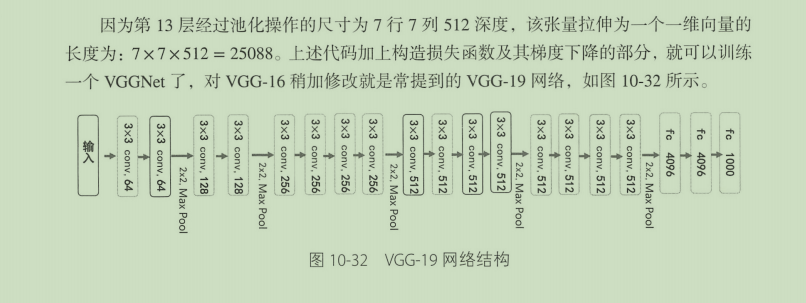